In [ ]:
import pandas as pd
import numpy as np
import csv
from sklearn import tree
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
import math
from sklearn.metrics import confusion_matrix

In [ ]:
#######################################################################################NOTE#######################################################################################
# if running on shared drive please uncomment the two lines
#######################################################################################NOTE#######################################################################################
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


# Using the kaggle games.csv file

## todo

make new columns for the difference
label is the 'HOME_TEAM_WINS' column

Predictive model is built off the game data, but the inputs will be from the team's averages from 'n' number of games prior.

## Preprocessing

In [ ]:
#read in game data with some basic box score stats from seasons 2003-2020
#######################################################################################NOTE#######################################################################################
# if running on shared drive please uncomment the two lines
#######################################################################################NOTE#######################################################################################
#games = pd.read_csv('/content/drive/Shareddrives/CS 584/notebooks/games.csv').dropna(axis=0)
games = pd.read_csv('last_n_datasets/games.csv').dropna(axis=0)
#drop unnecessary columns
games = games.drop(labels=['GAME_ID', 'TEAM_ID_away', 'TEAM_ID_home', 'GAME_STATUS_TEXT'], axis=1)
# convert dates to actual datetime object
games['GAME_DATE_EST'] = pd.to_datetime(games['GAME_DATE_EST'])
#drop the 2003 season as CHA was not in the league this season
games = games[games['SEASON'] != 2003]
#replace all ID numbers with team names to make data easier to read and handle
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].astype(str)
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612737','ATL')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612738','BOS')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612740','NOP')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612741','CHI')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612742','DAL')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612743','DEN')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612745','HOU')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612746','LAC')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612747','LAL')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612748','MIA')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612749','MIL')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612750','MIN')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612751','BKN')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612752','NYK')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612753','ORL')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612754','IND')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612755','PHI')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612756','PHX')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612757','POR')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612758','SAC')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612759','SAS')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612760','OKC')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612761','TOR')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612762','UTA')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612763','MEM')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612764','WAS')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612765','DET')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612766','CHA')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612739','CLE')
games['HOME_TEAM_ID'] = games['HOME_TEAM_ID'].replace('1610612744','GSW')

games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].astype(str)
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612737','ATL')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612738','BOS')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612740','NOP')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612741','CHI')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612742','DAL')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612743','DEN')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612745','HOU')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612746','LAC')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612747','LAL')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612748','MIA')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612749','MIL')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612750','MIN')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612751','BKN')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612752','NYK')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612753','ORL')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612754','IND')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612755','PHI')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612756','PHX')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612757','POR')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612758','SAC')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612759','SAS')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612760','OKC')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612761','TOR')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612762','UTA')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612763','MEM')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612764','WAS')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612765','DET')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612766','CHA')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612739','CLE')
games['VISITOR_TEAM_ID'] = games['VISITOR_TEAM_ID'].replace('1610612744','GSW')
#group dataframe by season and create list of team names for further data processing purposes
bySeason = {key: games.loc[value] for key, value in games.groupby("SEASON").groups.items()}
team_names = ['ATL', 'BOS', 'NOP', 'CHI','DAL', 'DEN', 'HOU', 'LAC', 'LAL', 'MIA', 'MIL', 'MIN', 
              'BKN', 'NYK', 'ORL', 'IND', 'PHI', 'PHX', 'POR', 'SAC', 'SAS',
              'OKC', 'TOR', 'UTA', 'MEM', 'WAS', 'DET', 'CHA', 'CLE', 'GSW']

In [ ]:
games

,GAME_DATE_EST,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2021-05-26,PHI,WAS,2020,120.0,0.557,0.684,0.429,26.0,45.0,95.0,0.402,0.633,0.091,22.0,40.0,1
1,2021-05-26,NYK,ATL,2020,101.0,0.383,0.739,0.364,15.0,54.0,92.0,0.369,0.818,0.273,17.0,41.0,1
2,2021-05-26,UTA,MEM,2020,141.0,0.544,0.774,0.487,28.0,42.0,129.0,0.541,0.763,0.348,20.0,33.0,1
3,2021-05-25,BKN,BOS,2020,130.0,0.523,0.955,0.447,31.0,46.0,108.0,0.424,0.783,0.353,23.0,43.0,1
4,2021-05-25,PHX,LAL,2020,102.0,0.465,0.933,0.308,21.0,31.0,109.0,0.450,0.871,0.303,24.0,39.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24672,2014-10-06,ATL,NOP,2014,93.0,0.419,0.821,0.421,24.0,50.0,87.0,0.366,0.643,0.375,17.0,43.0,1
24673,2014-10-06,CHI,WAS,2014,81.0,0.338,0.719,0.381,18.0,40.0,85.0,0.411,0.636,0.267,17.0,47.0,0
24674,2014-10-06,LAL,DEN,2014,98.0,0.448,0.682,0.500,29.0,45.0,95.0,0.387,0.659,0.500,19.0,43.0,1
24675,2014-10-05,TOR,SAC,2014,99.0,0.440,0.771,0.333,21.0,30.0,94.0,0.469,0.725,0.385,18.0,45.0,1


In [ ]:
games['GAME_DATE_EST'].max()

Timestamp('2021-05-26 00:00:00')

In [ ]:
(games['GAME_DATE_EST'][0] > games['GAME_DATE_EST'][24676])

True

In [ ]:
# metrics are always: home - away
# PTS, FG_PCT, FT_PCT, FG3_PCT, AST, REB, 
#games['PTS_diff'] = games['PTS_home'] - games['PTS_away']
games['FG_PCT_diff'] = games['FG_PCT_home'] - games['FG_PCT_away']
games['FT_PCT_diff'] = games['FT_PCT_home'] - games['FT_PCT_away']
games['FG3_PCT_diff'] = games['FG3_PCT_home'] - games['FG3_PCT_away']
games['AST_diff'] = games['AST_home'] - games['AST_away']
games['REB_diff'] = games['REB_home'] - games['REB_away']

In [ ]:
games_diff = games[['GAME_DATE_EST','SEASON','FG_PCT_diff', 'FT_PCT_diff', 'FG3_PCT_diff', 'AST_diff', 'REB_diff', 'HOME_TEAM_WINS']].copy()

In [ ]:
games_diff

,GAME_DATE_EST,SEASON,FG_PCT_diff,FT_PCT_diff,FG3_PCT_diff,AST_diff,REB_diff,HOME_TEAM_WINS
0,2021-05-26,2020,0.155,0.051,0.338,4.0,5.0,1
1,2021-05-26,2020,0.014,-0.079,0.091,-2.0,13.0,1
2,2021-05-26,2020,0.003,0.011,0.139,8.0,9.0,1
3,2021-05-25,2020,0.099,0.172,0.094,8.0,3.0,1
4,2021-05-25,2020,0.015,0.062,0.005,-3.0,-8.0,0
...,...,...,...,...,...,...,...,...
24672,2014-10-06,2014,0.053,0.178,0.046,7.0,7.0,1
24673,2014-10-06,2014,-0.073,0.083,0.114,1.0,-7.0,0
24674,2014-10-06,2014,0.061,0.023,0.000,10.0,2.0,1
24675,2014-10-05,2014,-0.029,0.046,-0.052,3.0,-15.0,1


In [ ]:
games_diff_by_season = {}
for s in (games_diff['SEASON'].unique()):
  games_diff_by_season[s] = games_diff[games_diff['SEASON'] == s]

games_by_season = {}
for s in (games['SEASON'].unique()):
  games_by_season[s] = games[games['SEASON'] == s]

In [ ]:
games_diff_by_season[2019]

,GAME_DATE_EST,SEASON,FG_PCT_diff,FT_PCT_diff,FG3_PCT_diff,AST_diff,REB_diff,HOME_TEAM_WINS
1206,2020-10-11,2019,-0.040,-0.052,0.043,2.0,-5.0,0
1207,2020-10-09,2019,0.005,-0.098,-0.056,-5.0,6.0,0
1208,2020-10-06,2019,-0.016,-0.049,-0.015,-7.0,-3.0,0
1209,2020-10-04,2019,0.083,0.154,0.020,2.0,-6.0,1
1210,2020-10-02,2019,-0.002,-0.324,-0.067,3.0,7.0,1
...,...,...,...,...,...,...,...,...
17673,2019-10-05,2019,0.143,0.164,0.164,11.0,16.0,1
17674,2019-10-05,2019,-0.082,0.136,-0.041,-12.0,-11.0,0
17675,2019-10-05,2019,-0.138,0.036,0.083,-7.0,-7.0,0
17676,2019-10-04,2019,0.009,-0.200,0.044,5.0,-3.0,0


## Modelling

In [ ]:
# predictor columns:
preds = ['FG_PCT_diff', 'FT_PCT_diff', 'FG3_PCT_diff', 'AST_diff', 'REB_diff']

In [ ]:
l = []
l.append(12)
print(l)

[12]


In [ ]:
# method to make a training set with specified season range
def make_trg_set(start_season, end_season, d):
  l = []
  for i in range(start_season, end_season+1):
    l.append(d[i])
  return pd.concat(l)

In [ ]:
training_set = make_trg_set(2004, 2019, games_diff_by_season)
training_set

,GAME_DATE_EST,SEASON,FG_PCT_diff,FT_PCT_diff,FG3_PCT_diff,AST_diff,REB_diff,HOME_TEAM_WINS
14568,2005-06-23,2004,0.007,0.128,0.493,-3.0,4.0,1
14569,2005-06-21,2004,-0.055,-0.069,-0.185,-4.0,3.0,0
14570,2005-06-19,2004,-0.023,0.255,-0.178,-3.0,-3.0,0
14571,2005-06-16,2004,0.085,0.200,-0.111,8.0,3.0,1
14572,2005-06-14,2004,0.038,0.115,-0.257,6.0,7.0,1
...,...,...,...,...,...,...,...,...
17673,2019-10-05,2019,0.143,0.164,0.164,11.0,16.0,1
17674,2019-10-05,2019,-0.082,0.136,-0.041,-12.0,-11.0,0
17675,2019-10-05,2019,-0.138,0.036,0.083,-7.0,-7.0,0
17676,2019-10-04,2019,0.009,-0.200,0.044,5.0,-3.0,0


In [ ]:
X_train = training_set[preds]
y_train = training_set['HOME_TEAM_WINS']
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)


RandomForestClassifier(n_estimators=1000)

In [ ]:
y_train

14568    1
14569    0
14570    0
14571    1
14572    1
        ..
17673    1
17674    0
17675    0
17676    0
17677    0
Name: HOME_TEAM_WINS, Length: 22086, dtype: int64

## Shaping Input

In [ ]:
# get average of the features for each team
games_2020 = games_by_season[2020]
games_2019 = games_by_season[2019]
print(games_2020.shape)

(1206, 22)


In [ ]:
games_2019['HOME_TEAM_ID'].unique()

array(['MIA', 'LAL', 'BOS', 'DEN', 'LAC', 'TOR', 'HOU', 'MIL', 'OKC',
       'DAL', 'UTA', 'ORL', 'POR', 'PHI', 'BKN', 'IND', 'MEM', 'PHX',
       'SAS', 'SAC', 'WAS', 'NOP', 'ATL', 'CHI', 'GSW', 'MIN', 'CLE',
       'NYK', 'CHA', 'DET'], dtype=object)

In [ ]:
# check for most recent game
in_use = games_2019.sort_values(by=['GAME_DATE_EST'], ascending=False)
a = in_use[(in_use['HOME_TEAM_ID'] == 'PHI') | (in_use['VISITOR_TEAM_ID'] == 'PHI')]
a10 = a.head(10)
a10
# if team in either home or away

,GAME_DATE_EST,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,FG_PCT_diff,FT_PCT_diff,FG3_PCT_diff,AST_diff,REB_diff
1261,2020-08-23,PHI,BOS,2019,106.0,0.427,0.794,0.265,12.0,39.0,110.0,0.463,0.759,0.343,19.0,42.0,0,-0.036,0.035,-0.078,-7.0,-3.0
1271,2020-08-21,PHI,BOS,2019,94.0,0.295,0.853,0.231,14.0,57.0,102.0,0.414,0.917,0.258,15.0,45.0,0,-0.119,-0.064,-0.027,-1.0,12.0
1279,2020-08-19,BOS,PHI,2019,128.0,0.512,0.724,0.442,20.0,43.0,101.0,0.418,0.811,0.238,21.0,38.0,1,0.094,-0.087,0.204,-1.0,5.0
1287,2020-08-17,BOS,PHI,2019,109.0,0.422,0.885,0.323,22.0,43.0,101.0,0.463,0.783,0.333,23.0,50.0,1,-0.041,0.102,-0.010,-1.0,-7.0
1293,2020-08-14,HOU,PHI,2019,96.0,0.438,0.875,0.250,25.0,27.0,134.0,0.563,0.818,0.474,31.0,51.0,0,-0.125,0.057,-0.224,-6.0,-24.0
1302,2020-08-12,PHI,TOR,2019,121.0,0.464,0.788,0.425,27.0,47.0,125.0,0.444,0.675,0.419,28.0,47.0,0,0.020,0.113,0.006,-1.0,0.0
1307,2020-08-11,PHI,PHX,2019,117.0,0.495,0.714,0.455,28.0,34.0,130.0,0.551,0.952,0.429,28.0,44.0,0,-0.056,-0.238,0.026,0.0,-10.0
1321,2020-08-09,POR,PHI,2019,124.0,0.473,0.931,0.314,19.0,41.0,121.0,0.485,0.765,0.467,24.0,48.0,1,-0.012,0.166,-0.153,-5.0,-7.0
1332,2020-08-07,PHI,ORL,2019,108.0,0.409,0.727,0.276,19.0,51.0,101.0,0.420,0.760,0.250,17.0,47.0,1,-0.011,-0.033,0.026,2.0,4.0
1342,2020-08-05,WAS,PHI,2019,98.0,0.424,0.792,0.333,17.0,48.0,107.0,0.463,0.690,0.379,27.0,41.0,0,-0.039,0.102,-0.046,-10.0,7.0


In [ ]:
# dict to store team averages
team_avgs = {}
# need to average both when the team is home and away, since those are separate games
# FG_PCT, FT_PCT, FG3_PCT, AST, REB
for id in (games_2020['HOME_TEAM_ID'].unique()):
  FG_PCT_avg = (games_2020[games_2020['HOME_TEAM_ID'] == id]['FG_PCT_home'].mean() 
              + games_2020[games_2020['HOME_TEAM_ID'] == id]['FG_PCT_away'].mean())/2
  FT_PCT_avg = (games_2020[games_2020['HOME_TEAM_ID'] == id]['FT_PCT_home'].mean() 
              + games_2020[games_2020['HOME_TEAM_ID'] == id]['FT_PCT_away'].mean())/2
  FG3_PCT_avg = (games_2020[games_2020['HOME_TEAM_ID'] == id]['FG3_PCT_home'].mean() 
               + games_2020[games_2020['HOME_TEAM_ID'] == id]['FG3_PCT_away'].mean())/2
  AST_avg = round((games_2020[games_2020['HOME_TEAM_ID'] == id]['AST_home'].mean() 
           + games_2020[games_2020['HOME_TEAM_ID'] == id]['AST_away'].mean())/2)
  REB_avg = round((games_2020[games_2020['HOME_TEAM_ID'] == id]['REB_home'].mean() 
           + games_2020[games_2020['HOME_TEAM_ID'] == id]['REB_away'].mean())/2)
  team_avgs[id] = pd.DataFrame([[FG_PCT_avg, FT_PCT_avg, FG3_PCT_avg, AST_avg, REB_avg]], 
                               columns = ['FG_PCT_avg', 'FT_PCT_avg', 'FG3_PCT_avg', 'AST_avg', 'REB_avg'])

In [ ]:
def get_all_team_avg_over_n_games(n, games_df):
  team_avgs = {}
  for id in (games_df['HOME_TEAM_ID'].unique()):
    team_avgs[id] = get_team_avg_over_n_games(id, n, games_df)
  return team_avgs

def get_team_avg_over_n_games(id, n, games_df):
  in_use = games_df.sort_values(by=['GAME_DATE_EST'], ascending=False)
  a = in_use[(in_use['HOME_TEAM_ID'] == id) | (in_use['VISITOR_TEAM_ID'] == id)]
  to_use = a.head(n)
  if n == 1:
    if (to_use['HOME_TEAM_ID'].iloc[0] == id):
      FG_PCT_avg = to_use[to_use['HOME_TEAM_ID'] == id]['FG_PCT_home']
      FT_PCT_avg = to_use[to_use['HOME_TEAM_ID'] == id]['FT_PCT_home']
      FG3_PCT_avg = to_use[to_use['HOME_TEAM_ID'] == id]['FG3_PCT_home']
      AST_avg = to_use[to_use['HOME_TEAM_ID'] == id]['AST_home']
      REB_avg = to_use[to_use['HOME_TEAM_ID'] == id]['REB_home']
    else:
      FG_PCT_avg = to_use[to_use['VISITOR_TEAM_ID'] == id]['FG_PCT_away']
      FT_PCT_avg = to_use[to_use['VISITOR_TEAM_ID'] == id]['FT_PCT_away']
      FG3_PCT_avg = to_use[to_use['VISITOR_TEAM_ID'] == id]['FG3_PCT_away']
      AST_avg = to_use[to_use['VISITOR_TEAM_ID'] == id]['AST_away']
      REB_avg = to_use[to_use['VISITOR_TEAM_ID'] == id]['REB_away']
  else:
    FG_PCT_avg = (to_use[to_use['HOME_TEAM_ID'] == id]['FG_PCT_home'].mean() 
                + to_use[to_use['VISITOR_TEAM_ID'] == id]['FG_PCT_away'].mean())/2
    FT_PCT_avg = (to_use[to_use['HOME_TEAM_ID'] == id]['FT_PCT_home'].mean() 
                + to_use[to_use['VISITOR_TEAM_ID'] == id]['FT_PCT_away'].mean())/2
    FG3_PCT_avg = (to_use[to_use['HOME_TEAM_ID'] == id]['FG3_PCT_home'].mean() 
                + to_use[to_use['VISITOR_TEAM_ID'] == id]['FG3_PCT_away'].mean())/2
    AST_avg = round((to_use[to_use['HOME_TEAM_ID'] == id]['AST_home'].mean() 
            + to_use[to_use['VISITOR_TEAM_ID'] == id]['AST_away'].mean())/2)
    REB_avg = round((to_use[to_use['HOME_TEAM_ID'] == id]['REB_home'].mean() 
            + to_use[to_use['VISITOR_TEAM_ID'] == id]['REB_away'].mean())/2)
  return pd.DataFrame([[FG_PCT_avg, FT_PCT_avg, FG3_PCT_avg, AST_avg, REB_avg]], 
                               columns = ['FG_PCT_avg', 'FT_PCT_avg', 'FG3_PCT_avg', 'AST_avg', 'REB_avg'])
  


In [ ]:
#team_avgs_1 = get_all_team_avg_over_n_games(1, games_2019)
team_avgs_5 = get_all_team_avg_over_n_games(5, games_2019)
team_avgs_10 = get_all_team_avg_over_n_games(10, games_2019)
team_avgs_20 = get_all_team_avg_over_n_games(20, games_2019)
team_avgs_30 = get_all_team_avg_over_n_games(30, games_2019)
team_avgs_40 = get_all_team_avg_over_n_games(40, games_2019)
team_avgs_50 = get_all_team_avg_over_n_games(50, games_2019)
team_avgs_60 = get_all_team_avg_over_n_games(60, games_2019)
team_avgs_70 = get_all_team_avg_over_n_games(70, games_2019)
team_avgs_80 = get_all_team_avg_over_n_games(80, games_2019)
avgs_list = [team_avgs_5, team_avgs_10, team_avgs_20, team_avgs_30, team_avgs_40, team_avgs_50, team_avgs_60, team_avgs_70, team_avgs_80]

In [ ]:
def make_test_sets(avgs_list):
  test_l = []
  for team_avgs in avgs_list:
    test = pd.DataFrame(columns=['HOME_TEAM_ID', 'VISITOR_TEAM_ID','FG_PCT_diff', 'FT_PCT_diff', 'FG3_PCT_diff', 'AST_diff', 'REB_diff', 'HOME_TEAM_WINS'])
    for index, row in games_2020.iterrows():
      # for each row, get the difference of the team averages (home - away)
      diff = (team_avgs[row['HOME_TEAM_ID']] - team_avgs[row['VISITOR_TEAM_ID']])
      # store differences in new df along with the outcome
      test.loc[len(test.index)] = [row['HOME_TEAM_ID'], row['VISITOR_TEAM_ID'], diff['FG_PCT_avg'][0], diff['FT_PCT_avg'][0], diff['FG3_PCT_avg'][0], diff['AST_avg'][0], diff['REB_avg'][0], row['HOME_TEAM_WINS']]
    test_l.append(test)
  return test_l

In [ ]:
tests = make_test_sets(avgs_list)

In [ ]:
tests

[     HOME_TEAM_ID VISITOR_TEAM_ID  FG_PCT_diff  ...  AST_diff  REB_diff HOME_TEAM_WINS
 0             PHI             WAS     0.008917  ...        -2         1              1
 1             NYK             ATL     0.052083  ...         0        -1              1
 2             UTA             MEM     0.011500  ...        -8        -9              1
 3             BKN             BOS    -0.042417  ...         1        -1              1
 4             PHX             LAL     0.037583  ...         4         6              0
 ...           ...             ...          ...  ...       ...       ...            ...
 1201          ATL             ORL     0.016833  ...         1         3              0
 1202          DET             NYK    -0.052250  ...        -1        -7              0
 1203          CHI             HOU     0.013917  ...         2         8              0
 1204          LAL             LAC     0.039333  ...         4         4              1
 1205          POR             S

In [ ]:
diff = (team_avgs['PHI'] - team_avgs['WAS'])

In [ ]:
diff

,FG_PCT_avg,FT_PCT_avg,FG3_PCT_avg,AST_avg,REB_avg
0,-0.004099,-0.021629,0.006946,0,-2


In [ ]:
X_test_1 = pd.DataFrame([[diff['FG_PCT_avg'][0], diff['FT_PCT_avg'][0], diff['FG3_PCT_avg'][0], diff['AST_avg'][0], diff['REB_avg'][0]]], columns=['FG_PCT_diff', 'FT_PCT_diff', 'FG3_PCT_diff', 'AST_diff', 'REB_diff'])

In [ ]:
rfc.predict(X_test_1)[0]

1

In [ ]:
res = []
for test in tests:
  X_test = test[['FG_PCT_diff', 'FT_PCT_diff', 'FG3_PCT_diff', 'AST_diff', 'REB_diff']]
  y_test = test['HOME_TEAM_WINS']
  pred = rfc.predict(X_test)
  pred_l = pred.tolist()
  y_test_l = y_test.tolist()
  cm = confusion_matrix(y_test_l, pred_l)
  #   0 1
  # 0
  # 1
  tot = np.sum(cm)
  acc = (cm[0][0] + cm[1][1]) / tot
  print(acc)
  res.append(acc)

0.5456053067993366
0.5679933665008292
0.5505804311774462
0.5630182421227198
0.5713101160862355
0.5754560530679934
0.5646766169154229
0.5696517412935324
0.560530679933665


In [ ]:
X_test = test[['FG_PCT_diff', 'FT_PCT_diff', 'FG3_PCT_diff', 'AST_diff', 'REB_diff']]
y_test = test['HOME_TEAM_WINS']

In [ ]:
pred = rfc.predict(X_test)

In [ ]:
type(pred)

numpy.ndarray

In [ ]:
y_test.to_numpy()

array([1, 1, 1, ..., 0, 1, 1], dtype=object)

In [ ]:
np.unique(y_test.to_numpy())

array([0, 1], dtype=object)

In [ ]:
x = np.array(pred)
x

array([1, 0, 1, ..., 1, 0, 0])

In [ ]:
pred_l = pred.tolist()
y_test_l = y_test.tolist()

In [ ]:
cm = confusion_matrix(y_test_l, pred_l)
#   0 1
# 0
# 1
tot = np.sum(cm)
print((cm[0][0] + cm[1][1]) / tot)

0.533167495854063


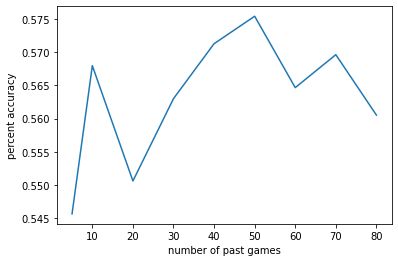

In [ ]:
from matplotlib import pyplot as plt

plt.plot([5, 10, 20, 30, 40, 50, 60, 70, 80], res)
plt.xlabel("number of past games")
plt.ylabel("percent accuracy")
#plt.xlim([0.2,0.8])
plt.show()

# Below is irrelevant

## Reading in ranking.csv

In [ ]:
path = '/content/drive/Shareddrives/CS 584/notebooks/ranking.csv'
data = []
with open(path, newline='') as f:
    reader = csv.reader(f)
    data = list(reader)
df_rank = pd.DataFrame(columns=data[0])
num_rows = len(data)
for i in range(1, num_rows):
  df_rank.loc[i] = data[i]

## Reading in player per game data

https://www.basketball-reference.com/leagues/NBA_2021_per_game.html

I tried taking in the file using the URL method but it was running into trouble with reading in the data. So I resorted to downloading it, reading in the txt file as a csv and using the csv library to turn the string into a list of lists.

In [ ]:
path = '/content/drive/Shareddrives/CS 584/notebooks/2020_2021.txt'
data = []
with open(path, newline='') as f:
    reader = csv.reader(f)
    data = list(reader)


FileNotFoundError: ignored

In [ ]:
data[0]

['Rk',
 'Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

In [ ]:
df_pergame = pd.DataFrame(columns=data[0])

In [ ]:
num_rows = len(data)
for i in range(1, num_rows):
  df_pergame.loc[i] = data[i]

In [ ]:
df_pergame

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,1,Precious Achiuwa\achiupr01,PF,21,MIA,61,4,12.1,2.0,3.7,.544,0.0,0.0,.000,2.0,3.7,.546,.544,0.9,1.8,.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
2,2,Jaylen Adams\adamsja01,PG,24,MIL,7,0,2.6,0.1,1.1,.125,0.0,0.3,.000,0.1,0.9,.167,.125,0.0,0.0,,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
3,3,Steven Adams\adamsst01,C,27,NOP,58,58,27.7,3.3,5.3,.614,0.0,0.1,.000,3.3,5.3,.620,.614,1.0,2.3,.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
4,4,Bam Adebayo\adebaba01,C,23,MIA,64,64,33.5,7.1,12.5,.570,0.0,0.1,.250,7.1,12.4,.573,.571,4.4,5.5,.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
5,5,LaMarcus Aldridge\aldrila01,C,35,TOT,26,23,25.9,5.4,11.4,.473,1.2,3.1,.388,4.2,8.3,.505,.525,1.6,1.8,.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,536,Delon Wright\wrighde01,PG,28,SAC,27,8,25.8,3.9,8.3,.462,1.2,3.1,.398,2.6,5.3,.500,.536,1.1,1.3,.833,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0
702,537,Thaddeus Young\youngth01,PF,32,CHI,68,23,24.3,5.4,9.7,.559,0.2,0.7,.267,5.3,9.1,.580,.568,1.0,1.7,.628,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1
703,538,Trae Young\youngtr01,PG,22,ATL,63,63,33.7,7.7,17.7,.438,2.2,6.3,.343,5.6,11.3,.491,.499,7.7,8.7,.886,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3
704,539,Cody Zeller\zelleco01,C,28,CHO,48,21,20.9,3.8,6.8,.559,0.1,0.6,.143,3.7,6.2,.598,.565,1.8,2.5,.714,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4


In [ ]:
df.Pos.unique()

array(['PF', 'PG', 'C', 'SG', 'SF', 'SF-PF', 'SG-SF', 'SF-SG', 'PF-C',
       'SG-PG', 'PG-SG', 'PF-SF', 'C-PF'], dtype=object)

## Reading in game schedule and outcome data

https://www.basketball-reference.com/leagues/NBA_2021_games-february.html

In [ ]:
path = '/content/drive/Shareddrives/CS 584/notebooks/2021_feb_games.txt'
data = []
with open(path, newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

In [ ]:
data[0]

['Date',
 'Start (ET)',
 'Visitor/Neutral',
 'PTS',
 'Home/Neutral',
 'PTS',
 '',
 '',
 'Attend.',
 'Notes']

In the original website, there are columns with no values in order to improve readability, so they have to be removed here.

In [ ]:
df_outcomes = pd.DataFrame(columns=data[0])

In [ ]:
num_rows = len(data)
for i in range(1, num_rows):
  df_outcomes.loc[i] = data[i]

In [ ]:
df_outcomes = df_outcomes.drop(columns=[""])

In [ ]:
df_outcomes

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS,Attend.,Notes
1,Mon Feb 1 2021,7:30p,Los Angeles Lakers,107,Atlanta Hawks,99,1341,
2,Mon Feb 1 2021,7:30p,Charlotte Hornets,129,Miami Heat,121,0,
3,Mon Feb 1 2021,8:00p,New York Knicks,102,Chicago Bulls,110,0,
4,Mon Feb 1 2021,8:00p,Minnesota Timberwolves,98,Cleveland Cavaliers,100,0,
5,Mon Feb 1 2021,8:00p,Portland Trail Blazers,106,Milwaukee Bucks,134,0,
...,...,...,...,...,...,...,...,...
208,Sun Feb 28 2021,8:00p,Memphis Grizzlies,133,Houston Rockets,84,3284,
209,Sun Feb 28 2021,8:00p,Golden State Warriors,91,Los Angeles Lakers,117,0,
210,Sun Feb 28 2021,8:00p,Atlanta Hawks,99,Miami Heat,109,0,
211,Sun Feb 28 2021,9:00p,Phoenix Suns,118,Minnesota Timberwolves,99,0,


### Todo
Something we should do is make a new column to have the win/loss result.

We also have to make a table to map the full team names to the abbreviated team names in the per game player data.